In [56]:
from keras_vggface.vggface import VGGFace
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras.preprocessing import image
import numpy as np
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [57]:
model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')


In [58]:
model.summary()

Model: "vggface_resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1/7x7_s2 (Conv2D)           (None, 112, 112, 64) 9408        input_9[0][0]                    
__________________________________________________________________________________________________
conv1/7x7_s2/bn (BatchNormaliza (None, 112, 112, 64) 256         conv1/7x7_s2[0][0]               
__________________________________________________________________________________________________
activation_98 (Activation)      (None, 112, 112, 64) 0           conv1/7x7_s2/bn[0][0]            
___________________________________________________________________________________

In [59]:
def feature_extractor(img_path , model):
    img = image.load_img(img_path , target_size= (224,224))
    img_array = image.img_to_array(img)

    expanded_img = np.expand_dims(img_array,axis=0) # Insert a new axis that will appear at the axis position in the expanded array shape.

    preprocessed_img = preprocess_input(expanded_img)

    return model.predict(preprocessed_img)



In [60]:
os.getcwd()

'd:\\vscode_machineLearning\\BEST_PROJECTS\\face-match'

In [61]:
os.chdir('d:\\vscode_machineLearning\\BEST_PROJECTS\\face-match')

In [62]:
os.getcwd()

'd:\\vscode_machineLearning\\BEST_PROJECTS\\face-match'

In [63]:
df = pd.read_csv(filepath_or_buffer=r'data_path\data_path.csv',index_col=False)
df = df.drop(columns='Unnamed: 0')

In [64]:
df

,img_path
0,data\Aamir_Khan\Aamir.100.jpg
1,data\Aamir_Khan\Aamir.101.jpg
2,data\Aamir_Khan\Aamir.103.jpg
3,data\Aamir_Khan\Aamir.105.jpg
4,data\Aamir_Khan\Aamir.106.jpg
...,...
8659,data\Zareen_Khan\Zareen_Khan.91.jpg
8660,data\Zareen_Khan\Zareen_Khan.92.jpg
8661,data\Zareen_Khan\Zareen_Khan.93.jpg
8662,data\Zareen_Khan\Zareen_Khan.94.jpg


In [65]:
df['img_path'][0]

'data\\Aamir_Khan\\Aamir.100.jpg'

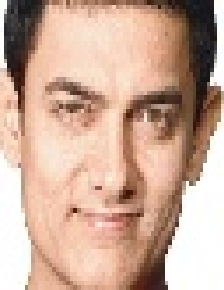

In [66]:
image.load_img(df['img_path'][0] , target_size= (290,224))

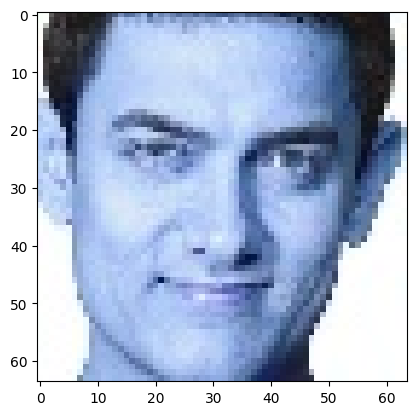

In [67]:
plt.imshow(cv2.imread(df['img_path'][0])) ## this also works.

In [68]:
image.img_to_array(image.load_img(df['img_path'][0] , target_size= (290,224)))

array([[[249., 255., 249.],
        [249., 255., 249.],
        [249., 255., 249.],
        ...,
        [255., 254., 250.],
        [255., 254., 250.],
        [255., 254., 250.]],

       [[249., 255., 249.],
        [249., 255., 249.],
        [249., 255., 249.],
        ...,
        [255., 254., 250.],
        [255., 254., 250.],
        [255., 254., 250.]],

       [[249., 255., 249.],
        [249., 255., 249.],
        [249., 255., 249.],
        ...,
        [255., 254., 250.],
        [255., 254., 250.],
        [255., 254., 250.]],

       ...,

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 255., 255.],
        [254., 255., 255.],
        [254., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 255., 255.],
        [254., 255., 255.],
        [254., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 2

> ##### Before applying np.expand_dims-> (height, width, channels)
>##### After applying np.expand_dims-> (1,height, width, channels) (The 1 at the beginning indicates that the image data now forms a batch of one image. Because I want to feed the images in the neural network thats why I am doing this.)


In [69]:
# cv2.imread(df['img_path'][0])
np.expand_dims(image.img_to_array(image.load_img(df['img_path'][0] , target_size= (290,224))),axis=0)

array([[[[249., 255., 249.],
         [249., 255., 249.],
         [249., 255., 249.],
         ...,
         [255., 254., 250.],
         [255., 254., 250.],
         [255., 254., 250.]],

        [[249., 255., 249.],
         [249., 255., 249.],
         [249., 255., 249.],
         ...,
         [255., 254., 250.],
         [255., 254., 250.],
         [255., 254., 250.]],

        [[249., 255., 249.],
         [249., 255., 249.],
         [249., 255., 249.],
         ...,
         [255., 254., 250.],
         [255., 254., 250.],
         [255., 254., 250.]],

        ...,

        [[254., 254., 254.],
         [254., 254., 254.],
         [254., 254., 254.],
         ...,
         [254., 255., 255.],
         [254., 255., 255.],
         [254., 255., 255.]],

        [[254., 254., 254.],
         [254., 254., 254.],
         [254., 254., 254.],
         ...,
         [254., 255., 255.],
         [254., 255., 255.],
         [254., 255., 255.]],

        [[254., 254., 254.],
       

In [70]:
np.expand_dims(image.img_to_array(image.load_img(df['img_path'][0] , target_size= (290,224))),axis=0).shape

(1, 290, 224, 3)

In [71]:
preprocess_input(np.expand_dims(image.img_to_array(image.load_img(df['img_path'][0] , target_size= (290,224))),axis=0)) 
#This function preprocesses the input image array according to the requirements of the specific pre-trained model

array([[[[155.406   , 150.23761 , 119.813705],
         [155.406   , 150.23761 , 119.813705],
         [155.406   , 150.23761 , 119.813705],
         ...,
         [156.406   , 149.23761 , 125.813705],
         [156.406   , 149.23761 , 125.813705],
         [156.406   , 149.23761 , 125.813705]],

        [[155.406   , 150.23761 , 119.813705],
         [155.406   , 150.23761 , 119.813705],
         [155.406   , 150.23761 , 119.813705],
         ...,
         [156.406   , 149.23761 , 125.813705],
         [156.406   , 149.23761 , 125.813705],
         [156.406   , 149.23761 , 125.813705]],

        [[155.406   , 150.23761 , 119.813705],
         [155.406   , 150.23761 , 119.813705],
         [155.406   , 150.23761 , 119.813705],
         ...,
         [156.406   , 149.23761 , 125.813705],
         [156.406   , 149.23761 , 125.813705],
         [156.406   , 149.23761 , 125.813705]],

        ...,

        [[160.406   , 149.23761 , 124.813705],
         [160.406   , 149.23761 , 124.813705]

In [72]:
preprocess_input(np.expand_dims(image.img_to_array(image.load_img(df['img_path'][0] , target_size= (290,224))),axis=0)).shape

(1, 290, 224, 3)

In [73]:
model.predict(preprocess_input(np.expand_dims(image.img_to_array(image.load_img(df['img_path'][0] , target_size= (224,224))),axis=0))).shape
# This method takes the input data, performs forward propagation through the pre-trained deep learning model, and generates predictions for the input data

(1, 2048)

In [74]:
print(f"After flatten {model.predict(preprocess_input(np.expand_dims(image.img_to_array(image.load_img(df['img_path'][0] , target_size= (224,224))),axis=0))).flatten().shape}")
print(f"Before flatten {model.predict(preprocess_input(np.expand_dims(image.img_to_array(image.load_img(df['img_path'][0] , target_size= (224,224))),axis=0))).shape}")

After flatten (2048,)
Before flatten (1, 2048)


## unpickling the file

In [75]:
import pickle

In [76]:
file_path = pickle.load(file=open(file=r'model/img_files_path.pkl',mode='rb'))

In [77]:
file_path

['data\\Aamir_Khan\\Aamir.100.jpg',
 'data\\Aamir_Khan\\Aamir.101.jpg',
 'data\\Aamir_Khan\\Aamir.103.jpg',
 'data\\Aamir_Khan\\Aamir.105.jpg',
 'data\\Aamir_Khan\\Aamir.106.jpg',
 'data\\Aamir_Khan\\Aamir.111.jpg',
 'data\\Aamir_Khan\\Aamir.112.jpg',
 'data\\Aamir_Khan\\Aamir.113.jpg',
 'data\\Aamir_Khan\\Aamir.115.jpg',
 'data\\Aamir_Khan\\Aamir.116.jpg',
 'data\\Aamir_Khan\\Aamir.118.jpg',
 'data\\Aamir_Khan\\Aamir.120.jpg',
 'data\\Aamir_Khan\\Aamir.121.jpg',
 'data\\Aamir_Khan\\Aamir.123.jpg',
 'data\\Aamir_Khan\\Aamir.125.jpg',
 'data\\Aamir_Khan\\Aamir.128.jpg',
 'data\\Aamir_Khan\\Aamir.129.jpg',
 'data\\Aamir_Khan\\Aamir.130.jpg',
 'data\\Aamir_Khan\\Aamir.132.jpg',
 'data\\Aamir_Khan\\Aamir.134.jpg',
 'data\\Aamir_Khan\\Aamir.142.jpg',
 'data\\Aamir_Khan\\Aamir.144.jpg',
 'data\\Aamir_Khan\\Aamir.151.jpg',
 'data\\Aamir_Khan\\Aamir.153.jpg',
 'data\\Aamir_Khan\\Aamir.158.jpg',
 'data\\Aamir_Khan\\Aamir.161.jpg',
 'data\\Aamir_Khan\\Aamir.163.jpg',
 'data\\Aamir_Khan\\Aamir.16

## Detect FAces

In [78]:
import numpy as np
from src.extract_features import model
from mtcnn import MTCNN 
import cv2
from pathlib import Path
import os
import matplotlib.pyplot as plt
from PIL import Image
from keras_vggface.utils import preprocess_input

In [79]:
detector = MTCNN()
detector

In [80]:
sample_img = cv2.imread(r'data_path\ranbir_kapoor.png')
sample_img.shape

(386, 686, 3)

In [81]:
result = detector.detect_faces(sample_img)
result

[2023-08-05 14:58:08,835: WARNING: def_function: 5 out of the last 16 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000001E223D59A60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.]
[2023-08-05 14:58:09,276: WARNING: def_function: 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000001E22412D940> triggered tf.function retracing. Tracing 

[{'box': [308, 60, 89, 116],
  'confidence': 0.9997389912605286,
  'keypoints': {'left_eye': (335, 107),
   'right_eye': (377, 107),
   'nose': (357, 135),
   'mouth_left': (340, 153),
   'mouth_right': (372, 154)}}]

In [82]:
result[0]['box']

[308, 60, 89, 116]

In [83]:
X , y,width,height = result[0]['box']

In [84]:
face =sample_img[y:y+height,X:X+width]
face.shape

(116, 89, 3)

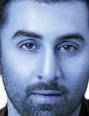

In [85]:
img = Image.fromarray(face)
img

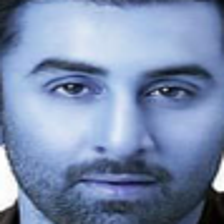

In [100]:
img = img.resize(size=(224,224))
img

In [101]:

face_array = np.asarray(img).astype(np.float32)
face_array

array([[[30., 35., 38.],
        [30., 35., 38.],
        [32., 37., 40.],
        ...,
        [ 6., 13., 20.],
        [ 5., 12., 18.],
        [ 5., 12., 17.]],

       [[31., 36., 39.],
        [31., 36., 39.],
        [33., 38., 41.],
        ...,
        [ 6., 14., 22.],
        [ 6., 13., 20.],
        [ 6., 12., 19.]],

       [[33., 39., 42.],
        [33., 39., 42.],
        [35., 41., 44.],
        ...,
        [ 7., 17., 27.],
        [ 7., 15., 24.],
        [ 7., 14., 22.]],

       ...,

       [[60., 56., 53.],
        [63., 59., 56.],
        [71., 67., 65.],
        ...,
        [ 2.,  4.,  0.],
        [ 4.,  4.,  1.],
        [ 4.,  4.,  1.]],

       [[70., 65., 63.],
        [70., 66., 63.],
        [73., 68., 67.],
        ...,
        [ 1.,  3.,  0.],
        [ 2.,  3.,  0.],
        [ 2.,  3.,  0.]],

       [[74., 69., 67.],
        [74., 69., 67.],
        [73., 68., 67.],
        ...,
        [ 1.,  3.,  0.],
        [ 2.,  3.,  0.],
        [ 2.,  3.,  0.]]

In [102]:
expanded_img=np.expand_dims(face_array,axis=0)
preprocessed_img = preprocess_input(expanded_img)
preprocessed_img.shape

(1, 224, 224, 3)

In [103]:
model.predict(preprocessed_img).shape

(1, 2048)

In [104]:
model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')


In [105]:
model.predict(preprocessed_img)

array([[0.        , 1.8864355 , 2.3729825 , ..., 1.8746039 , 0.70590335,
        7.3883324 ]], dtype=float32)

## similarity score

In [1]:
lst = [(5735, 0.83096075), (5719, 0.8015584), (5729, 0.7987916), (5762, 0.795514), (5723, 0.79027814)]

In [16]:
similarity = []
index = []

for i ,j in lst:
    index.append(j)
    similarity.append(i)
    # print(j)

In [18]:
similarity , index

([5735, 5719, 5729, 5762, 5723],
 [0.83096075, 0.8015584, 0.7987916, 0.795514, 0.79027814])

In [20]:
type([list])

list

In [1]:
a =[5735, 5719, 5729, 5762, 5723]
b= [0.83096075, 0.8015584, 0.7987916, 0.795514, 0.79027814]

In [4]:
for i in list(zip(a,b)):
    print(i[0])

5735
5719
5729
5762
5723


In [5]:
lst = [(5735, 0.83096075), (5719, 0.8015584), (5729, 0.7987916), (5762, 0.795514), (5723, 0.79027814)]

In [8]:
for i in lst:
    print(i)

(5735, 0.83096075)
(5719, 0.8015584)
(5729, 0.7987916)
(5762, 0.795514)
(5723, 0.79027814)
